In [1]:
import csv, sys
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
raw = pd.read_csv('/Users/songkim/Google Drive/Primary/Projects/VerbVector/CREA_vrating_context_wb.csv', index_col=0)

In [3]:
raw.head()

,Lemma,Database,AspClass,SynClass,No,Word,WC,ID,KRNS,N,...,Dom_PoS_SUBTLEX,All_PoS_SUBTLEX,Percentage_dom_PoS,Context 1,Context 2,Context 3,Context 4,Context 5,Context 6,Context 7
0,approach,CREA,activity,trans,181,approached,2,19,Y,27,...,Noun,Noun.Verb,0.63,The yellow dog approached the friendly teacher.,The priest approached the lonely family.,The mob approached the embassy.,The car approached the river.,NaN,NaN,NaN
1,arrest,CREA,achieve,trans,182,arrested,2,201,Y,30,...,Noun,Noun.Verb.Name,0.56,The soldier arrested the injured activist.,The policeman arrested the angry driver.,NaN,NaN,NaN,NaN,NaN
2,eat,CREA,activity,trans,183,ate,2,245,Y,29,...,Verb,Verb.Noun,1.00,The old farmer ate at the expensive hotel.,The dog ate the egg.,The commander ate chicken at dinner.,The tourist ate bread on vacation.,The reporter ate at the new restaurant.,NaN,NaN
3,block,CREA,else,trans,184,blocked,2,187,Y,27,...,Noun,Noun.Verb.Name,0.80,The bicycle blocked the green door.,The cloud blocked the sun.,NaN,NaN,NaN,NaN,NaN
4,buy,CREA,achieve,trans,185,bought,2,23,Y,29,...,Verb,Verb.Noun,0.99,The doctor bought the used boat.,The banker bought the expensive boat.,The diplomat bought the aggressive dog.,The parent bought the magazine.,The woman bought medicine at the store.,NaN,NaN


In [4]:
#raw_es = vector with only "Event/Social" features
raw_es = raw[['Lemma', 'AspClass', 'SynClass', 'TimeCREA', 'DurationCREA', 'Long', 'Short', 'Caused', 'Consequential', 'Social', 'Human', 'Communication', 'Self', 'Cognition']]

In [5]:
raw_es.head()

,Lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345
3,block,else,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552


In [6]:
#plt.scatter(rc_es["Consequential"], rc_es["SynClass"])
#plt.xlabel("ratings on 'Consequential'")
#plt.ylabel("SynClass")
#plt.show()

In [7]:
synclass = set(raw_es['SynClass'].to_list())
synclass

{'trans', 'unacc', 'unerg'}

In [8]:
#Let's test how event/social features cluster the datapoints into three clusters. 
K=3
Centroids = (raw_es.sample(n=K))

#for initial plotting
# plt.scatter(rc_es["Caused"], rc_es["SynClass"], c='black')
# plt.scatter(Centroids["Caused"], Centroids["SynClass"], c='red')
# plt.show()

In [9]:
features = raw_es.columns.to_list()[3:]
features

['TimeCREA',
 'DurationCREA',
 'Long',
 'Short',
 'Caused',
 'Consequential',
 'Social',
 'Human',
 'Communication',
 'Self',
 'Cognition']

In [10]:
#enumerate(features)

In [11]:
for i, j in enumerate(features):
    print (i,j)

0 TimeCREA
1 DurationCREA
2 Long
3 Short
4 Caused
5 Consequential
6 Social
7 Human
8 Communication
9 Self
10 Cognition


In [12]:
dic = {1:3, 2:4, 3:5}
len(dic.values())
#np.sqrt(sum(dic.values()))

3

In [13]:
diff = 1
j=0


while(diff!=0):
    XD=raw_es
    i=1
    for index_c,row_c in Centroids.iterrows():
        ED=[]
        for index_r,row_r in XD.iterrows():
            d_dict = {}
            for a, b in enumerate(features):
                d_dict[a+1] = (row_c[b]-row_r[b])**2
            d=np.sqrt(sum(d_dict.values()))
            ED.append(d)
        raw_es[i]=ED
        i=i+1
        
        
    C=[]
    for index,row in raw_es.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    raw_es["Cluster"]=C
    Centroids_new = raw_es.groupby(["Cluster"]).mean()[features]
    

    if j == 0:
        diff=1
        j=j+1
    else:
        diff = 0
        for c, d in enumerate(features):
            diff += (Centroids_new[d] - Centroids[d]).sum()
        print(diff)
    Centroids = raw_es.groupby(["Cluster"]).mean()[features]

1.4229763160051756


/Users/songkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/Users/songkim/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0.93681861634742
0.6950307179487184
0.8005521410256423
1.0358899067599072
0.0


In [14]:
raw_es.drop([1, 2, 3], axis=1)

,Lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Cluster
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111,2
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,1
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345,3
3,block,else,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963,1
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,want,state,trans,0.6154,0.8846,1.5769,1.8462,1.9231,3.6154,2.3846,4.7692,2.1923,3.4615,4.4615,2
58,watch,activity,trans,1.0690,1.5862,1.6207,2.0345,1.1724,1.9655,2.2069,2.7586,2.4483,3.5862,2.4483,3
59,go,achieve,unerg,1.0000,1.1290,1.2581,1.8387,1.5161,2.2903,1.7097,3.4194,0.7742,2.9677,0.8065,3
60,work,activity,unerg,4.5000,4.2857,2.6429,1.3571,2.8929,4.3214,4.9286,4.8929,3.4286,5.1071,4.0714,2


In [15]:
raw_es

,Lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,1,2,3,Cluster
0,approach,activity,trans,1.0741,1.6667,0.5185,2.9630,1.7037,3.2963,4.1481,3.8889,2.4815,2.9259,1.1111,4.180230,2.979728,3.450860,2
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,4.126788,5.045434,6.390605,1
2,eat,activity,trans,3.2759,2.5862,0.7241,2.7241,2.4483,2.4483,2.0000,2.7931,0.6552,5.1034,1.0345,5.419397,5.518398,2.854566,3
3,block,else,trans,0.5185,1.0741,1.6296,1.5556,3.4074,4.2593,1.8889,2.2593,0.7778,0.7407,1.2963,1.423540,5.839898,3.998373,1
4,buy,achieve,trans,1.8276,1.8276,0.8621,3.0000,1.8276,2.8276,4.5517,4.4828,3.2759,4.1034,2.6552,5.580585,1.717259,4.504806,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,want,state,trans,0.6154,0.8846,1.5769,1.8462,1.9231,3.6154,2.3846,4.7692,2.1923,3.4615,4.4615,4.651101,3.212753,4.628622,2
58,watch,activity,trans,1.0690,1.5862,1.6207,2.0345,1.1724,1.9655,2.2069,2.7586,2.4483,3.5862,2.4483,4.579891,3.386288,2.265519,3
59,go,achieve,unerg,1.0000,1.1290,1.2581,1.8387,1.5161,2.2903,1.7097,3.4194,0.7742,2.9677,0.8065,3.729017,4.987439,1.573514,3
60,work,activity,unerg,4.5000,4.2857,2.6429,1.3571,2.8929,4.3214,4.9286,4.8929,3.4286,5.1071,4.0714,8.077945,4.955026,7.388720,2


In [16]:
# color=['blue','green','cyan']
# for k in range(K):
#     data=raw_es[raw_es["Cluster"]==k+1]
#     plt.scatter(data["AspClass"],data["SynClass"],c=color[k])
# #plt.scatter(Centroids["AspClass"],Centroids["SynClass"],c='red')
# plt.xlabel('AspClass')
# plt.ylabel('SynClass')
# plt.show()

In [17]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [70]:
raw_es.sort_values(by= ['Cluster', 'AspClass']).drop([1,2,3], axis=1)

,Lemma,AspClass,SynClass,TimeCREA,DurationCREA,Long,Short,Caused,Consequential,Social,Human,Communication,Self,Cognition,Cluster
6,build,accompl,trans,1.4194,2.2581,2.7419,1.5161,3.7742,2.7742,2.8387,4.8710,0.7742,1.3226,2.9355,1
1,arrest,achieve,trans,0.6000,1.6333,1.0667,2.4333,3.6000,5.2667,5.5333,3.9333,2.2000,0.1000,1.6667,1
5,break,achieve,trans,0.2593,1.1481,0.5185,3.0741,4.9630,5.2222,0.5926,1.8519,0.2963,1.0741,0.3704,1
10,damage,achieve,trans,0.2414,0.7931,1.1724,2.1034,5.2759,4.8276,1.0000,1.7931,0.4138,0.5517,0.4483,1
12,destroy,achieve,trans,0.5200,1.1200,1.6000,1.9600,5.4800,5.0800,1.3200,2.7600,0.5600,0.2800,0.5200,1
15,drop,achieve,trans,0.2333,2.4333,0.0667,4.1000,2.8333,4.0333,0.6667,1.0667,0.3000,1.5667,0.6333,1
16,end,achieve,unacc,2.3478,2.5652,0.8696,2.4348,4.3043,3.1739,1.3043,2.0000,0.5652,1.3478,1.5652,1
19,fix,achieve,trans,1.0000,1.3793,2.0000,2.0345,4.8276,3.4483,1.9310,3.9655,1.2414,2.8966,3.5172,1
35,lose,achieve,trans,0.4231,0.3462,1.6923,1.6923,2.5385,4.1923,0.7692,1.8077,0.8846,1.3846,2.3846,1
50,steal,achieve,trans,0.5172,0.7931,0.5517,2.7241,2.8966,5.4828,2.7586,4.7586,0.7586,0.1724,2.3103,1


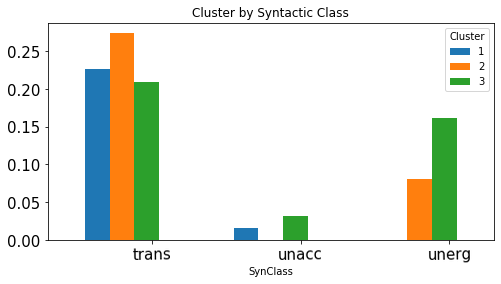

In [66]:
#raw_es.groupby(['SynClass','Cluster']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot.bar()
fig = raw_es.groupby(['SynClass','Cluster']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot(kind='bar',  figsize=(8, 4), fontsize=15, position=0.9, rot=1, title='Cluster by Syntactic Class').get_figure()
fig.savefig('/users/songkim/Google Drive/Primary/Projects/VerbVector/cluster_by_synclass.pdf')

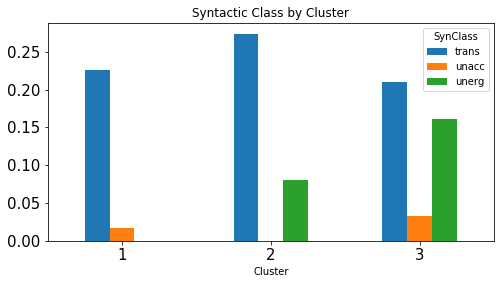

In [71]:
fig2 = raw_es.groupby(['Cluster','SynClass']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot(kind='bar',  figsize=(8, 4), fontsize=15, rot=1, title='Syntactic Class by Cluster').get_figure()
fig2.savefig('/users/songkim/Google Drive/Primary/Projects/VerbVector/synclass_by_cluster.pdf')

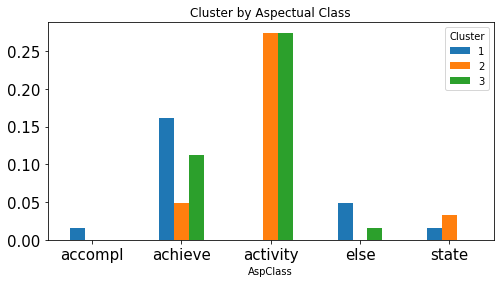

In [64]:
fig3 = raw_es.groupby(['AspClass','Cluster']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot(kind='bar',  figsize=(8, 4), fontsize=15, rot=0, title='Cluster by Aspectual Class').get_figure()
fig3.savefig('/users/songkim/Google Drive/Primary/Projects/VerbVector/cluster_by_aspclass.pdf')

#raw_es.groupby(['AspClass','Cluster']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot.bar()

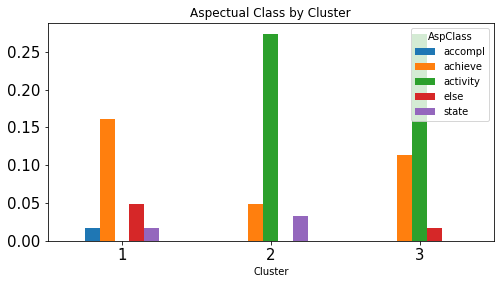

In [68]:
fig4 = raw_es.groupby(['Cluster','AspClass']).size().transform(lambda x: x/sum(x)).unstack(fill_value=0).plot(kind='bar',  figsize=(8, 4), fontsize=15, rot=1, title='Aspectual Class by Cluster').get_figure()
fig4.savefig('/users/songkim/Google Drive/Primary/Projects/VerbVector/aspclass_by_cluster.pdf')

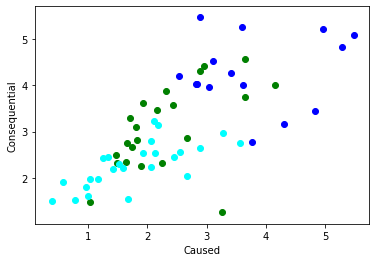

In [21]:
color=['blue','green','cyan']
for k in range(K):
    data=raw_es[raw_es["Cluster"]==k+1]
    plt.scatter(data["Caused"],data["Consequential"],c=color[k])
#plt.scatter(Centroids["AspClass"],Centroids["SynClass"],c='red')
plt.xlabel('Caused')
plt.ylabel('Consequential')
#plt.show()
plt.savefig('/users/songkim/Google Drive/Primary/Projects/verbvector/caused_consequential_scatter.png', format='png')

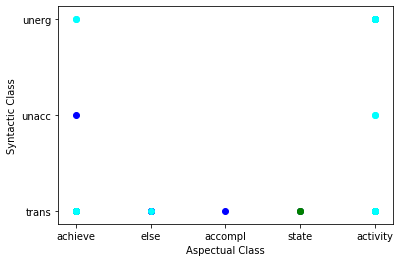

In [22]:
color=['blue','green','cyan']
for k in range(K):
    data=raw_es[raw_es["Cluster"]==k+1]
    plt.scatter(data["AspClass"],data["SynClass"],c=color[k])
#plt.scatter(Centroids["AspClass"],Centroids["SynClass"],c='red')
plt.xlabel('Aspectual Class')
plt.ylabel('Syntactic Class')
plt.show()

In [23]:
groups = raw_es.groupby('Cluster')

In [24]:
raw_es['AspClass']

0     activity
1      achieve
2     activity
3         else
4      achieve
5      achieve
6      accompl
7     activity
8     activity
9         else
10     achieve
11     achieve
12     achieve
13    activity
14    activity
15     achieve
16     achieve
17       state
18    activity
19     achieve
20    activity
21     achieve
22     achieve
23    activity
24    activity
25    activity
26    activity
27    activity
28        else
29     achieve
30    activity
31     achieve
32       state
33    activity
34    activity
35     achieve
36    activity
37    activity
38    activity
39     achieve
40    activity
41    activity
42     achieve
43    activity
44    activity
45    activity
46    activity
47    activity
48    activity
49    activity
50     achieve
51        else
52     achieve
53     achieve
54    activity
55    activity
56    activity
57       state
58    activity
59     achieve
60    activity
61    activity
Name: AspClass, dtype: object

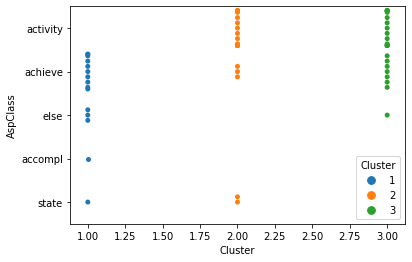

In [25]:
import seaborn as sns
sns.swarmplot("Cluster", 'AspClass', hue='Cluster', data=raw_es)


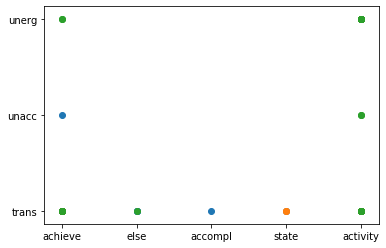

In [26]:
fig, ax = plt.subplots()
for name, group in groups:
    ax.scatter(group['AspClass'], group['SynClass'], marker='o', label=name)
    

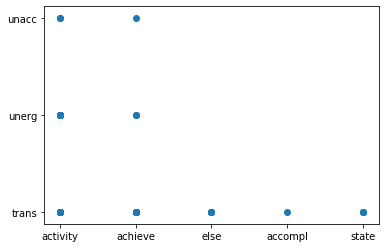

In [27]:
plt.scatter(raw_es['AspClass'], raw_es["SynClass"])

In [28]:
raw_neat = raw_es.sort_values(by=['Cluster']).drop([1,2,3], axis=1)

In [29]:
raw_neat.to_csv('/Users/songkim/Google Drive/Primary/Projects/VerbVector/kmeans_result.csv')